# Exploratory Data Analysis on Summer Olympics dataset

### Table of Contents
- 1. [Problem Statement](#section1)</br>
- 2. [Data Loading and Description](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
- 4. [Questions](#section4)</br>
    - 4.1 [Of the total dataset, how many medals are gold, silver and bronze?](#section401)<br/>
    - 4.2 [Who has been awarded more number of medals? Male or female?](#section402)<br/>
    - 4.3 [Which city has seen the maximum number of medals won by sportspersons?](#section403)<br/>
    - 4.4 [How is the performance of the men and women considering different medals won by them?](#section404)<br/>
    - 4.5 [How the medals are distributed in different sports?](#section405)<br/>            
    - 4.6 [Distribution of medals won by different countries till date.](#section406)<br/>
    - 4.7 [Best performing country every year at Summer Olympics](#section407)<br/>
    - 4.8 [Performance of India at Summer Olympics](#section408)<br/>
- 5. [Conclusions and Actionable Insights](#section5)</br>

## 1. Problem Statement

   This dataset is summer olympics dataset with data collected from the year 1896 to 2012. By studying this dataset, we can see 
   how different sports have been encouraged by different countries. We will have an overview on performance of men and women 
   over the years. Also, how the various sports are distributed in Olympics events.

## 2. Data Loading and Desciption:

   This dataset contains information of all summer olympics held from the year 1896 to 2012. Summer olympics is an event held
   every 4 years and countries from all over the world particiapte in different sporting events.
   

####   Importing the packages

In [1]:
import numpy as np                                                 # Implements milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and its numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
sns.set()

from subprocess import check_output

#####     Importing the dataset

In [2]:
olympics_data=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/summer%20olympics.csv')

## 3. Data Profiling

   In the upcoming sections we will first understand our dataset using various pandas functionalities.
   Then with the help of pandas profiling we will find which columns of our dataset need preprocessing.
   In preprocessing we will deal with erronous and missing values of columns.
   Again we will do pandas profiling to see how preprocessing have transformed our dataset.

###  3.1 Understanding the dataset
  Let us start with gaining an insight on the dataset by observing column level analysis.
        

In [3]:
olympics_data.shape                   # This will print the number of rows and comlumns of the Data Frame

(31165, 9)

In [46]:
olympics_data.Discipline.describe()

count         31163
unique           67
top       Athletics
freq           3638
Name: Discipline, dtype: object

Summer olymics dataset has 31165 rows and 9 columns. Let us start with having a look on the columns

In [4]:
olympics_data.columns                 # This will print the names of all columns.

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

In [5]:
olympics_data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


Columns wise description

Year  - years in which Summer olympic games were held

City - venue of the olympic games in that year

Sport - This column has different sections, can be called as Disciplines

Event - Further event is a subset of disciplines

Athlete - Name of the sportsperson winning the medal

Country - Country which the athlete is representing

Gender - Male/Female

Medal - Gold/Silver/Bronze

In [6]:
olympics_data.tail()                     #This will print the last 5 rows of the Data Frame

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31164,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


In [7]:
olympics_data.info()                                         # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
Year          31165 non-null int64
City          31165 non-null object
Sport         31165 non-null object
Discipline    31165 non-null object
Athlete       31165 non-null object
Country       31161 non-null object
Gender        31165 non-null object
Event         31165 non-null object
Medal         31165 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [8]:
olympics_data.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [9]:
olympics_data.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

From the above output we can see that only Country column contains null values

### 3.2 Pre profiling

1. By pandas profiling, an interactive HTML report gets generated which contins all the information about the columns of the 
   dataset, like the counts and type of each column. Detailed information about each column, coorelation between different
   columns and a sample of dataset.
2. It gives us visual interpretation of each column in the data.
3. Spread of the data can be better understood by the distribution plot.
4. Grannular level analysis of each column.

In [10]:
profile = pandas_profiling.ProfileReport(olympics_data)
profile.to_file(output_file= "olympics_data_before_preprocessing.html")

As the name suggests, this profiling is done before preprocessing, hence the name "olympics_data_before_preprocessing.html".
Let us have a look on the file and see what useful insights can be drawn.
Based on that, we will preprocess the data to gain a better understanding.

### 3.3 Pre processing

Actionable items:
1) Remove duplicate rows from the dataset.
2) Dealing with missing values in 'Country' column


In [11]:
olympics_data.drop_duplicates(keep='first',inplace=True)     # Removing duplicates, but keeping the first occurrence

In [12]:
# Replacing missing cells in Country column
olympics_data.Country = olympics_data.Country.fillna(olympics_data['Country'].mode()[0])

### 3.4 Post Pandas Profiling

In [13]:
profile = pandas_profiling.ProfileReport(olympics_data)
profile.to_file(output_file= "olympics_data_after_preprocessing.html")

As we are done with preprocessing of data, the dataset does not contain any duplicate rows or missing values.
From the data obtained after preprocessing, below insights are drawn.

1) Total of 147 countries have won medals.
2) 22762 sportspersons have won medals for their countries in 67 different disciplines.
3) A discipline can contain multiple events.
4) From 1896 to 2012, summer olympics took place in 22 different cities.
5) Michael Phelps is topping the medal list till 2012.

In [14]:
olympics_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31163 entries, 0 to 31164
Data columns (total 9 columns):
Year          31163 non-null int64
City          31163 non-null object
Sport         31163 non-null object
Discipline    31163 non-null object
Athlete       31163 non-null object
Country       31163 non-null object
Gender        31163 non-null object
Event         31163 non-null object
Medal         31163 non-null object
dtypes: int64(1), object(8)
memory usage: 2.4+ MB


# 4. Questions

### 4.1 Of the total dataset, how many medals are gold, silver and bronze?

Text(0.5, 1.0, 'Bar Chart showing the Number of Medals of each type')

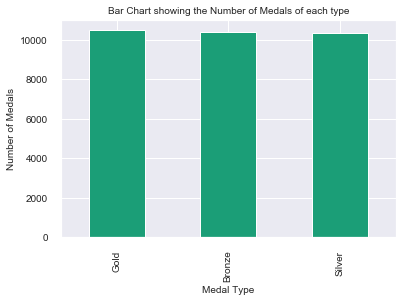

In [15]:
olympics_data['Medal'].value_counts().plot.bar(figsize=(6,4), colormap='Dark2', fontsize=10)

# Using matplotlib to add labels and title to the plot.
plt.xlabel('Medal Type', fontsize=10)
plt.ylabel('Number of Medals', fontsize=10)
plt.title('Bar Chart showing the Number of Medals of each type', fontsize=10)

From the bar graph, we can see that the number of gold medals is the highest followed by bronze.
Let us the get the exact count of the number of medals won.

In [16]:
olympics_data.groupby(['Medal'])['Medal'].count().sort_values()

Medal
Silver    10310
Bronze    10369
Gold      10484
Name: Medal, dtype: int64

### 4.2 Who has been awarded more number of medals? Male or female?

Text(0.5, 1.0, 'Bar Chart showing the Number of Medals of each type')

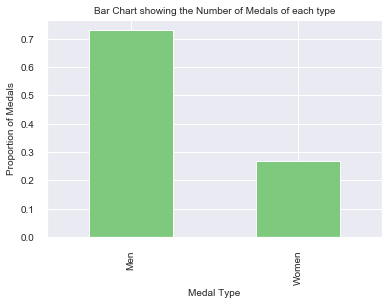

In [17]:
(olympics_data['Gender'].value_counts() / len(olympics_data)).plot.bar(figsize=(6,4), colormap='Accent', fontsize=10)

# Using matplotlib to add labels and title to the plot.
plt.xlabel('Medal Type', fontsize=10)
plt.ylabel('Proportion of Medals', fontsize=10)
plt.title('Bar Chart showing the Number of Medals of each type', fontsize=10)

Of the given dataset, it is clear that males have won around 72% of the total medals while females are at 28%.

### 4.3 Which city has seen the maximum number of medals won by sportspersons?

Text(0.5, 1.0, 'Donut Plot showing the proportion of medals won in different cities')

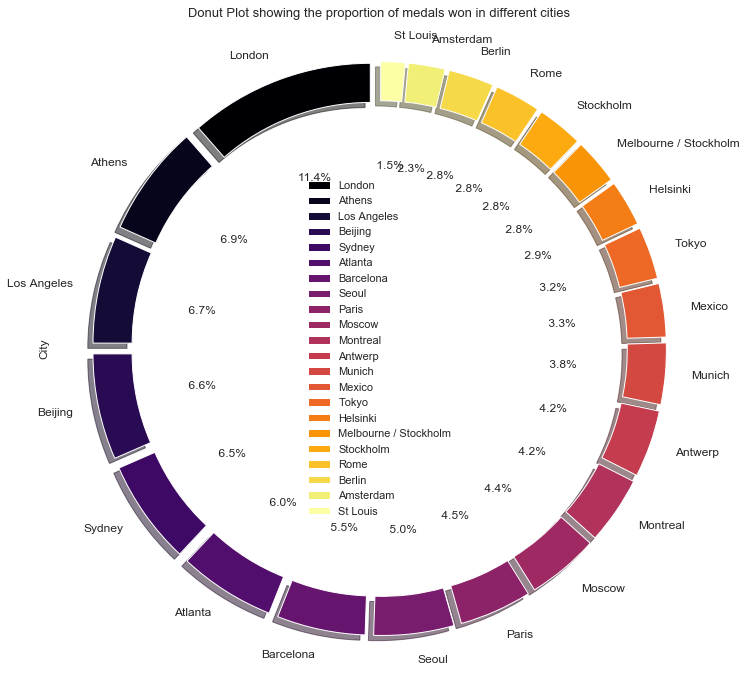

In [18]:
count=olympics_data['City'].nunique()
space = count * [0.1]
olympics_data['City'].value_counts().plot(kind='pie', fontsize=12, explode=space, autopct='%4.1f%%', wedgeprops=dict(width=0.15), 
                                      shadow=True, startangle=90, legend=True, figsize=(12,12), cmap='inferno')
plt.title('Donut Plot showing the proportion of medals won in different cities', fontsize=13)

From the above pie chart, it is quite evident that most number of medals have been won at London followed by Athens, Los Angeles, Beijing and so on.

### 4.4 How is the performance of the men and women considering different medals won by them?

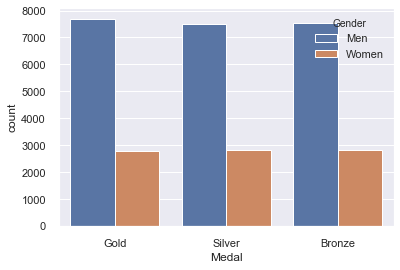

In [19]:
sns.countplot('Medal',data=olympics_data, hue='Gender')

From the above countplot, below inferences can be drawn:
Men have won more gold medals than silver or bronze. However, the number of gold, silver and bronze medals won by women are roughly identical.
Let's get the exact count

In [20]:
len(olympics_data[(olympics_data['Medal']=='Gold') & (olympics_data['Gender']=='Men')]) # Number of gold medals won by men

7697

In [21]:
len(olympics_data[(olympics_data['Medal']=='Gold') & (olympics_data['Gender']=='Women')]) # Number of gold medals won by women

2787

In [22]:
len(olympics_data[(olympics_data['Medal']=='Silver') & (olympics_data['Gender']=='Men')]) # Number of silver medals won by men

7509

In [23]:
len(olympics_data[(olympics_data['Medal']=='Silver') & (olympics_data['Gender']=='Women')]) # Number of silver medals won by women

2801

In [24]:
len(olympics_data[(olympics_data['Medal']=='Bronze') & (olympics_data['Gender']=='Men')]) # Number of bronze medals won by men

7539

In [25]:
len(olympics_data[(olympics_data['Medal']=='Bronze') & (olympics_data['Gender']=='Women')]) # Number of bronze medals won by women

2830

Text(0.5, 1.0, 'Performance of Female Athletes over time')

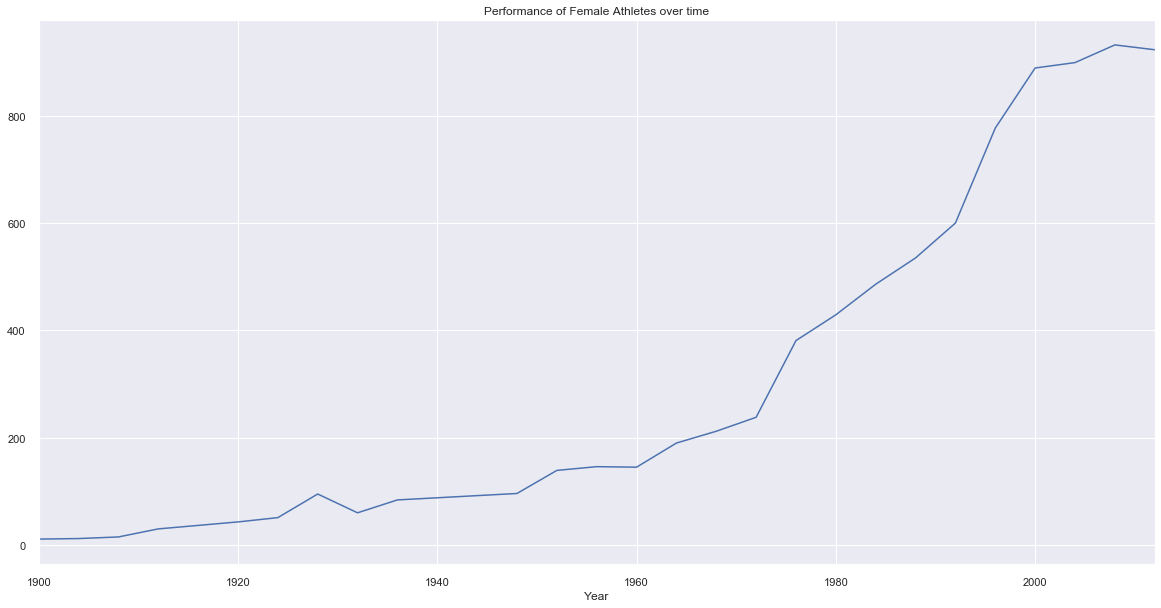

In [26]:
medalwrtgender=olympics_data.groupby('Year')['Gender'].value_counts()
plt.figure(figsize=(20, 10))
medalwrtgender.loc[:,'Women'].plot()
plt.title('Performance of Female Athletes over time')

Text(0.5, 1.0, 'Performance of Male Athletes over time')

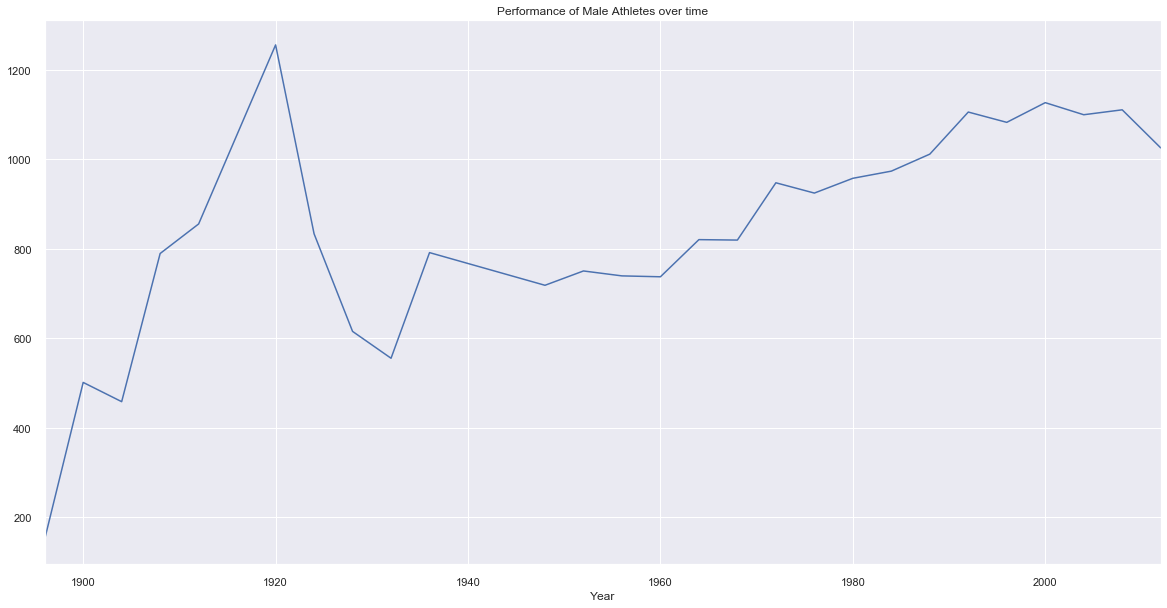

In [27]:
medalwrtgender=olympics_data.groupby('Year')['Gender'].value_counts()
plt.figure(figsize=(20, 10))
medalwrtgender.loc[:,'Men'].plot()
plt.title('Performance of Male Athletes over time')

What we can immediately see is that for women:
We have a steep increase in the medal tally.
Women tend to perform better over the years.

On the other hand, the growth for men seems less strong.

### 4.5 How the medals are distributed in different sports?

Text(0.5, 1.0, 'Relation Between Pclass and Embarked')

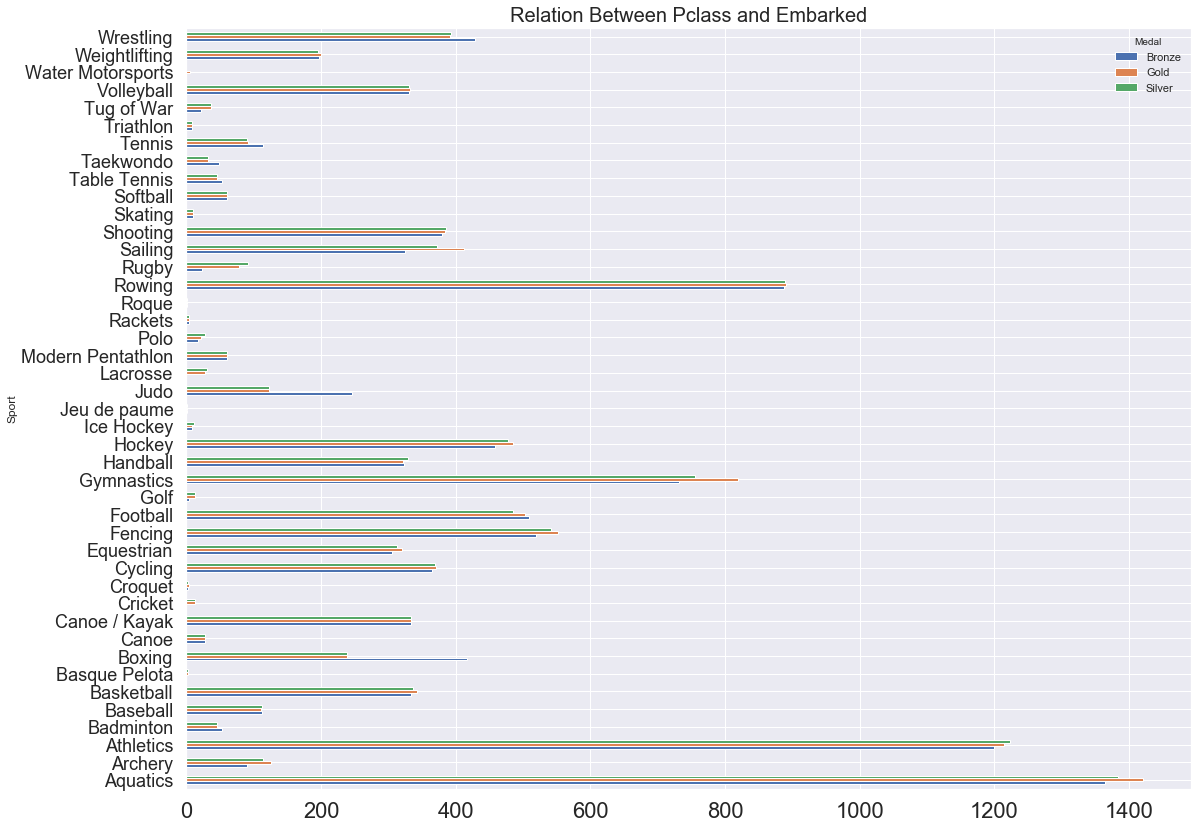

In [28]:
relation = pd.crosstab( olympics_data.Sport, olympics_data.Medal )
relation.plot.barh(figsize=(18,14))
plt.xticks(size = 22)
plt.yticks(size = 18)
plt.title('Relation Between Pclass and Embarked',size=20)

#### Below inferences can be drawn basis above plot:

1)Number of medals is highest in Aquatics sport segments. This may imply that aquatics hold many events or aquatics is 
   present in Olympics since a long time.
2)After aquatics, number of medals is highest in athletics, followed by Rowing, Gymnastics and so on.
Many countries who have not done fairly well can concentrate more on these sports so that chances of them getting a medal can increase.

### 4.6 Distribution of medals won by different countries till date.

We have a total of 147 countries winning medals in different events.

In [29]:
olympics_data['Country'].nunique()

147

Let's study the top 30 countries in terms of medal won from the dataset.

In [30]:
medalcount=olympics_data.Country.value_counts().reset_index(name='Medal').head(30)

Text(0.5, 1, 'Medals per Country')

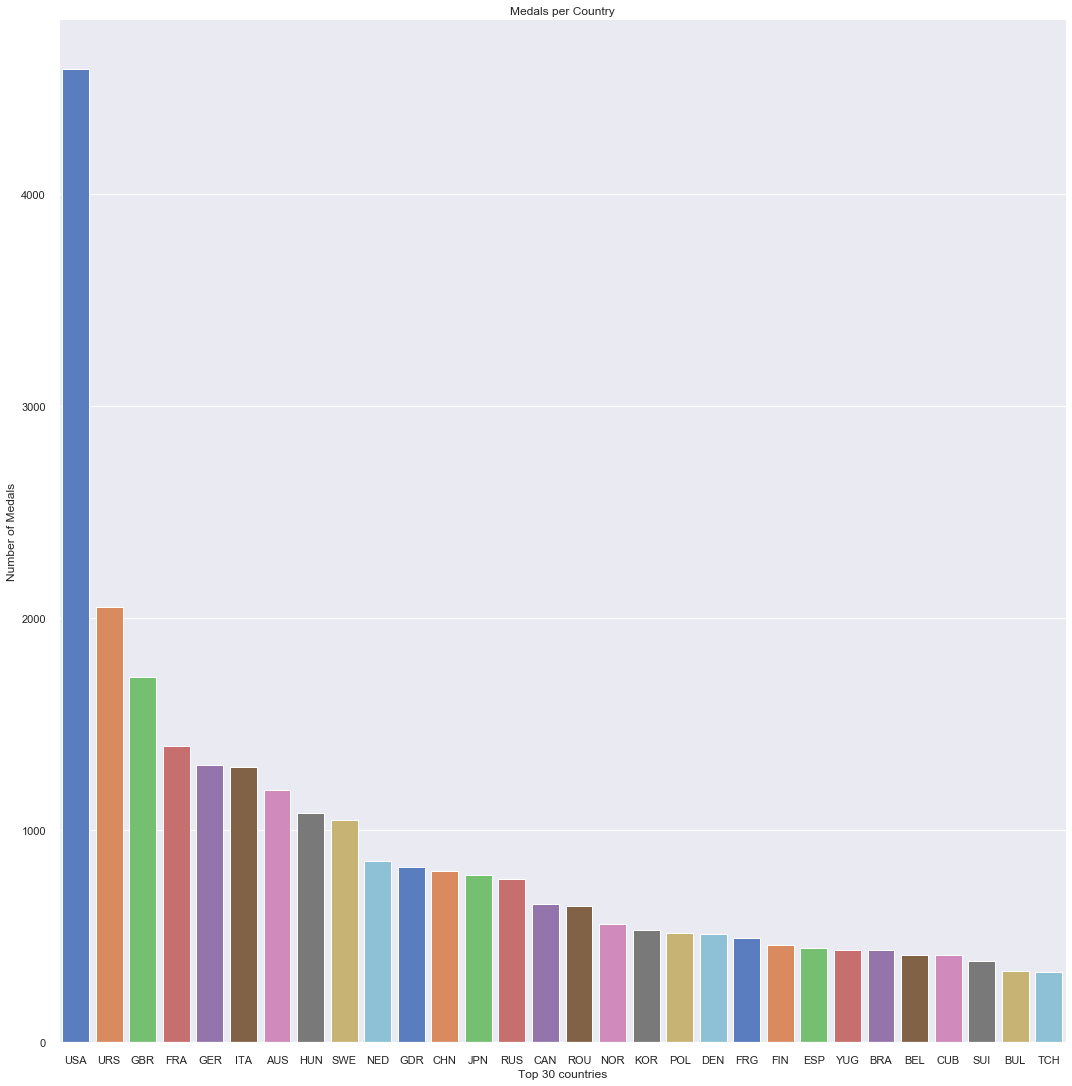

In [31]:
med=sns.catplot(x="index", y="Medal", data=medalcount,
                height=15, kind="bar", palette="muted")
med.set_xlabels("Top 30 countries")
med.set_ylabels("Number of Medals")
plt.title('Medals per Country')

USA is topping the chart with more than 4500 medals followed by Soviet Union(now Russia), Great Britain, France and Italy.
India is nowhere to be seen :(

Correlation of features.

In [32]:
olympics_new = olympics_data.copy(deep=True)   

In [33]:
from sklearn.preprocessing import LabelEncoder                                    # Label encoder is used to transform non-numerical labels to numerical labels.
number = LabelEncoder()                                                           # Here as our data set consists only of categorical values except age
for i in olympics_new.columns:                                                          # in order to find the correlation between variables, we do Label encoding 
    olympics_new[i] = number.fit_transform(olympics_new[i].astype('str'))

In [34]:
corr=olympics_new.corr()['Medal']
corr[np.argsort(corr,axis=0)[::-1]]

Medal         1.000000
Event         0.014555
Country       0.008974
Discipline    0.002408
Sport         0.000854
City         -0.000599
Gender       -0.001159
Athlete      -0.003114
Year         -0.028650
Name: Medal, dtype: float64

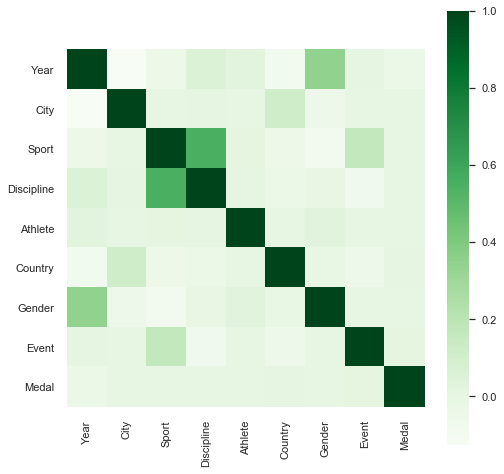

In [35]:
features_correlation = olympics_new.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Greens')
plt.show()

Observation:
Sport and discipline are highly correlated. Also, we see a mild positive correlation between Gender(Men is labelled as 0, Women is labelled as 1) and Year(1896 is labelled as 0 and so on) which we had discussed above.

### 4.7 Best performing country at Summer Olympics yearwise.

Let's have a look on the dataset and find the best performing country every year. In this case, I am measuring performance on the basis of total number of medals won.

In [36]:
ol=olympics_data.copy(deep=True)    # Creating a copy of the dataset to add one numeric column as Medalcount
ol['Medalcount']=1
ol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31163 entries, 0 to 31164
Data columns (total 10 columns):
Year          31163 non-null int64
City          31163 non-null object
Sport         31163 non-null object
Discipline    31163 non-null object
Athlete       31163 non-null object
Country       31163 non-null object
Gender        31163 non-null object
Event         31163 non-null object
Medal         31163 non-null object
Medalcount    31163 non-null int64
dtypes: int64(2), object(8)
memory usage: 2.6+ MB


In [37]:
groupYearCountry = ol.groupby(by=['Year','Country'],as_index=False).sum()  # Grouping the dataset by year and country

In [38]:
groupYearCountry = groupYearCountry.groupby(by=['Year','Country'],as_index=False).sum()

For a particular year, it sorts according to Medalcount column in descending order, so the country with most medals that year will be at top.
So, taking head(1) means taking only the top row.

In [39]:
yeartop = pd.DataFrame() 
y = ol.Year.unique()                    #Gets the Year numbers
for i in y:
    yeartop = pd.concat([yeartop,groupYearCountry[groupYearCountry['Year'] == i].sort_values(by=['Medalcount'],ascending= False).head(1)])

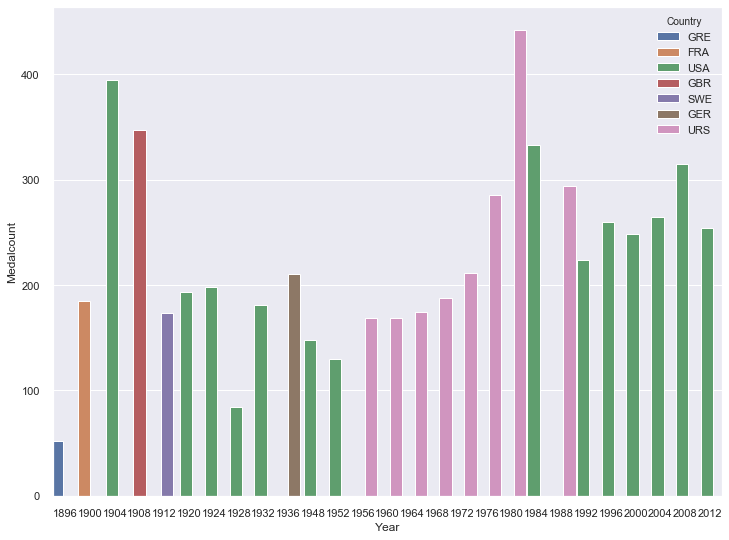

In [40]:
import pylab as plt
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
sns.barplot('Year','Medalcount',hue='Country',data = yeartop)
def change_width(ax, new_value) :                                              # writing a function to increase the bar width
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
change_width(ax, 0.50)
plt.show()

From the above plot it is quite evident that: 
1.USA(green bar) is the top performing country most of the time. 
2.URS(Soviet Union) had been exceptional performers during 1956 to 1980. But USA surpassed them during 90s. One reason behind
  this may be the disintegration of USSR during that time. Many countries disintegrated from Soviet Union and thus numerous  
  athletes started representing their own countries, for example, Uzbekistan, Ukraine, Kazakhstan.
3.Germany has been top performer during Nazi rule in 1936. Germany was one of the most developed nation during that time.
4.Olympics did not happen during world wars in the year 1916, 1940 and 1944.

### 4.8 Performance of India at Summer Olympics

In [41]:
olympics_data_IND=olympics_data[(olympics_data['Country']=='IND')]  # Total number of medals won by India in Olympics
olympics_data_IND

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
241,1900,Paris,Athletics,Athletics,"PRITCHARD, Norman",IND,Men,200M,Silver
244,1900,Paris,Athletics,Athletics,"PRITCHARD, Norman",IND,Men,200M Hurdles,Silver
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold
5513,1928,Amsterdam,Hockey,Hockey,"CHAND, Dyan",IND,Men,Hockey,Gold
5514,1928,Amsterdam,Hockey,Hockey,"GATELEY, Maurice A.",IND,Men,Hockey,Gold
5515,1928,Amsterdam,Hockey,Hockey,"GILL, K. S.",IND,Men,Hockey,Gold
5516,1928,Amsterdam,Hockey,Hockey,"GOODSIR-CULLEN, William John",IND,Men,Hockey,Gold
5517,1928,Amsterdam,Hockey,Hockey,"HAMMOND, Leslie Charles",IND,Men,Hockey,Gold
5518,1928,Amsterdam,Hockey,Hockey,"KHAN, Feroze Uddin",IND,Men,Hockey,Gold
5519,1928,Amsterdam,Hockey,Hockey,"MARTHINS, George E.",IND,Men,Hockey,Gold


Total number of medals is 183 but this number is the medal count which every player won either solo or in group. However, the group event medals should be considered as only one medal as per IOC(International Olympic Committee)

In [42]:
olympics_data_IND.groupby(['Year','Event'],as_index=False).max()['Medal'].value_counts() # Considering group event medals as a single medal

Bronze    11
Gold       9
Silver     6
Name: Medal, dtype: int64

So, India has won 11 bronze, 9 gold and 6 silver medals till 2012. Total count is 26. 
Let's plot the India's performace over the years

In [43]:
dfindyear = olympics_data_IND.groupby(['Year','Event'],as_index=False).max()  # Getting the data of 26 olympics medals by India

In [44]:
indmedalcount=dfindyear.Year.value_counts().reset_index(name='Medal')  # Getting the medal count each year for India

Text(0.5, 1, 'Medals for India over the years')

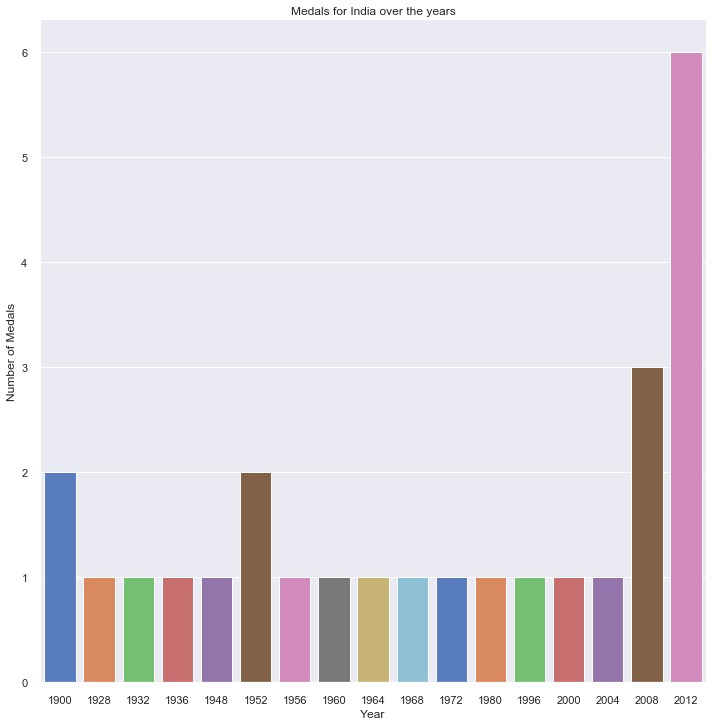

In [45]:
med=sns.catplot(x="index", y="Medal", data=indmedalcount,   
                height=10, kind="bar", palette="muted")
med.set_xlabels("Year")
med.set_ylabels("Number of Medals")
plt.title('Medals for India over the years')

Performance of India has not been impressive in the Olympics. India has done its best in Hockey(years 1928-1980). 2012 was the year in which India won 6 medals.

## 5. Conclusion and Actionable insights

CONCLUSION:

1) Performance of women were better than that of men over the years.

2) Overall, USA has been the best performing nation at Olympics till 2012.

3) Olympics did not happen during world wars in the year 1916, 1940 and 1944.

4) Most number of medals have been won at London. This is true as London has hosted Olympics most(thrice), followed by LA(2 times).

5) Medal counts depends largely on economical factors. USA being most developed nation is on the top in most of the Olympics. Soviet Union were unbeatable during 1950s-80s. However, disintegration of USSR affected a lot in Olympics also. 

ACTIONABLE INSIGHTS:

1) Of the given dataset, it is clear that males have won around 72% of the total medals while females are at 28%. However, when we consider performance, women’s graph tend to be more increasing than me. International Olympics Committee should organize more events for women as they have exhibited better potential.

2) Most number of medals have been won in Aquatics segment followed by Athletics and Rowing. This in turn means that most number of events are organized in these sports. Many countries which have not done fairly well should concentrate on these areas as the chances of them getting a medal will increase by doing so.

3) India have done fairly well in Hockey and Shooting. India has immense talent in these 2 areas and more focus can be given here by Indian authorities.